# U.S. Medical Insurance Costs

In this project, a **CSV** file with medical insurance costs will be investigated using Python fundamentals. The goal with this project will be to analyze various attributes within **insurance.csv** to learn more about the patient information in the file and gain insight into potential use cases for the dataset.

In [1]:
# import the csv library
import csv

To start, all necessary libraries must be imported. For this project the only library needed is the `csv` library in order to work with the **insurance.csv** data. There are other potential libraries (pandas) that could help with this project; however, for this analysis project, using just the `csv` library will suffice for loading and utilizing classes and functions for analysis.

The next step is to look through **insurance.csv** in order to get aquanted with the data. The following aspects of the data file will be checked in order to plan out how to import the data into a Python file:
* The names of columns and rows
* Any noticeable missing data
* Types of values (numerical vs. categorical)

In [2]:
# look at the first 10 rows of the csv to see what is in there
with open('insurance.csv', newline='') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    i=0
    for row in csvreader:
        if i == 10:
            break
        else:
            print(', '.join(row))
            i +=1

age,sex,bmi,children,smoker,region,charges
19,female,27.9,0,yes,southwest,16884.924
18,male,33.77,1,no,southeast,1725.5523
28,male,33,3,no,southeast,4449.462
33,male,22.705,0,no,northwest,21984.47061
32,male,28.88,0,no,northwest,3866.8552
31,female,25.74,0,no,southeast,3756.6216
46,female,33.44,1,no,southeast,8240.5896
37,female,27.74,3,no,northwest,7281.5056
37,male,29.83,2,no,northeast,6406.4107


**insurance.csv** contains the following columns:
* Patient Age
* Patient Sex 
* Patient BMI
* Patient Number of Children
* Patient Smoking Status
* Patient U.S Geopraphical Region
* Patient Yearly Medical Insurance Cost

There are no signs of missing data. To store this information, seven empty lists will be created hold each individual column of data from **insurance.csv**.

In [3]:
# Create empty lists for the various column of insurance.csv
ages = []
sexes = []
bmis = []
num_children = []
smoker_statuses = []
regions = []
insurance_charges = []

In [4]:
# function to load csv data by column
def load_list_data(lst, filename, col):
    # open the csv
    with open(filename) as csv_info:
        # read the data from the csv
        csv_dict = csv.DictReader(csv_info)
        # walk through the data in each row of the csv 
        for row in csv_dict:
            # add data from each row to list
            lst.append(row[col])
        # return list
        return lst

In [5]:
%%capture
# use capture on a cell to prevent the output from dominating the screen

# load the data into insurance_csv_dict
load_list_data(ages, 'insurance.csv', 'age')
load_list_data(sexes, 'insurance.csv', 'sex')
load_list_data(bmis, 'insurance.csv', 'bmi')
load_list_data(num_children, 'insurance.csv', 'children')
load_list_data(smoker_statuses, 'insurance.csv', 'smoker')
load_list_data(regions, 'insurance.csv', 'region')
load_list_data(insurance_charges, 'insurance.csv', 'charges')

The data from **insurance.csv** is neatly organized into labeled lists and analysis can begin. This is where one must plan out what to investigate and how to perform the analysis. There are many aspects of the data that could be looked into. The following operations will be implemented:
* find average age of the patients
* find geographical location of the patients
* compare costs for smokers and non-smokers
* compare average age to number of children

To perform these inspections, a class called `PatientsData` has been built out which contains four methods:
* `analyze_ages()`
* `unique_regions()`
* `analyze_smokers()`
* `analyze_age_v_children`

plus let's create a dictionary (so five methods)
* `create_dictionary()`

The class has been built out below. YAY Object Oriented Programming!

In [6]:
class PatientsData:
    # init method that takes in each list as a parameter
    def __init__(self, age, sex, bmi, num_children, smoker, location, charges):
        self.age = age
        self.sex = sex
        self.bmi = bmi
        self.num_children = num_children
        self.smoker = smoker
        self.location = location
        self.charges = charges
        
    # method that calculates the average age of patients in the dataset
    def analyze_ages(self):
        # initialize the sum of the ages to zero
        sum_age = 0
        # iterate through all the values in ages list
        for age in self.age:
            # sum of the ages
            # ages are strings in the csv
            sum_age += int(age)
        avg_age = sum_age/len(self.age)
        avg_age = round(avg_age, 1)
        # calculate the variance and then the standard deviation
        var_age = [(int(i)-avg_age)**2 for i in self.age]
        std_age = (sum(var_age)/len(var_age))**0.5
        std_age = round(std_age, 1)
        # return the average age and standard deviation
        return(f'The average patient age from the dataset is {avg_age} with a standard deviation of {std_age}')
    
    # method that groups the dataset by region and counts the number of patients in each region
    def unique_regions(self):
        # create empty dictionary
        region_dict = {}
        for x in self.location:
            # check if exists in region_dict or not
            if x not in region_dict.keys():
                region_dict[x] = 1
            else:
                # adds the count
                region_dict[x] += 1
        for region in region_dict:
            # print the count of patients in each region
            print(f'{region_dict[region]} patients live in the {region}')
    
    # method that calculates the average insurance charges for smokers and non-smokers
    def analyze_smokers(self):
        # creates empty dictionary
        smoker_dict = {}
        for cost, smoker in zip(self.charges, self.smoker):
            # check if exists in smoker_dict or not
            if smoker not in smoker_dict.keys():
                # costs are stored as strings in the file
                smoker_dict[smoker] = {'cost': float(cost), 'count':1}
            else:
                # adds the count of patients and adds their insurance cost to ongoing total
                smoker_dict[smoker]['cost'] += float(cost)
                smoker_dict[smoker]['count'] += 1
        for smoker in smoker_dict.keys():
            # calculates the average cost per smoker type
            avg_cost = round(smoker_dict[smoker]['cost']/smoker_dict[smoker]['count'],0)
            # create print statements and language proper from if they are a smoker or not
            if smoker == 'no':
                str_not = ' not'
            else:
                str_not = ''
            print(f'Patients who do{str_not} smoke have an average insurance charge of ${avg_cost}')
        
    # method that groups patients by the number of children they have and calculates the average age of those patients 
    def analyze_age_v_children(self):
        # creates empty dictionary
        children_dict = {}
        for age, num_children in zip(self.age, self.num_children):
            # check if exists in children_dict or not
            if num_children not in children_dict.keys():
                # ages are stored as strings in the file
                children_dict[num_children] = {'age': int(age), 'count':1}
            else:
                # adds the count of patients adds their count of children 
                children_dict[num_children]['age'] += int(age)
                children_dict[num_children]['count'] += 1
        for num_children in children_dict.keys():
            # calculates the average age per number of children
            avg_age = round(children_dict[num_children]['age']/children_dict[num_children]['count'],1)
            # creates print statements that match child/children depending on the value
            if num_children == 1:
                print(f'The average patient age for having {num_children} child is {avg_age}')
            else:
                print(f'The average patient age for having {num_children} children is {avg_age}')
                
    # method to create a dictionary with the patient data easily accessable
    def create_dictionary(self):
        self.patients_dictionary = {}
        for patient_id, age, sex, bmi, num_children, smoker, location, charges in zip(range(len(self.age)), self.age, self.sex, self.bmi, self.num_children, self.smoker, self.location, self.charges):
            # create a key for each patient in the loaded data and the attributes as the keys within each item
            self.patients_dictionary['patient_' + str(patient_id)] = {'age': int(age),
                                                                        'sex': sex,
                                                                        'bmi': float(bmi),
                                                                        'num_children': int(num_children),
                                                                        'smoker': smoker, 
                                                                        'location': location,
                                                                        'charges': float(charges)
                                                                       }
        return self.patients_dictionary

Let's create an instance of the class `PatientsData` and load the lists created from **insurance.csv**

In [7]:
patient_info = PatientsData(ages, sexes, bmis, num_children, smoker_statuses, regions, insurance_charges)

In [8]:
patient_info.analyze_ages()

'The average patient age from the dataset is 39.2 with a standard deviation of 14.0'

The first task was the check the average age of the patients in the dataset. The average age was 39.2 years old. This is the first check to make sure the dataset is representative of the broader population. If it is decided to use the dataset to make inferences about other populations, the data must abundant and broad enough for such use cases.

In [9]:
patient_info.unique_regions()

325 patients live in the southwest
364 patients live in the southeast
325 patients live in the northwest
324 patients live in the northeast


The second task was to check the distribution of patients across the different regions. This shows a pretty uniform distribution in each of the 4 regions. Similar to above, it is important to check that this dataset is representative of a broader population of individuals. If a person were to use this dataset to create a classification model, it would be imperitive to make sure that the attributes are balanced.

Quite often in the real-world, data is not balanced; this is an issue because it can lead to statistical issues when performing analysis. This is something that will be explored further in future portfolio projects!

In [10]:
patient_info.analyze_smokers()

Patients who do smoke have an average insurance charge of $32050.0
Patients who do not smoke have an average insurance charge of $8434.0


The third task was the compare the insurance charges of patients who smoked against those who did not smoke. Smokers on average have charges four times higher than that of non-smokers. There are other attributes in the dataset that effect the health of the individual (i.e., `BMI`, `gender`, `number of children`, and `age`). These attributes would better help explain the dataset. 

`BMI` and `age` could be grouped so we do an easier analysis. This dataset is ripe for data modeling.

In [11]:
patient_info.analyze_age_v_children()

The average patient age for having 0 children is 38.4
The average patient age for having 1 children is 39.5
The average patient age for having 3 children is 41.6
The average patient age for having 2 children is 39.4
The average patient age for having 5 children is 35.6
The average patient age for having 4 children is 39.0


The fourth task was to analyze the average age of the patients by the number of children they have. Again we see another equal distribution of ages.

In [12]:
patient_dict = patient_info.create_dictionary()

All patient data is now neatly organized in a dictionary to look at the values of each patient. This is convenient for further analysis if a decision is made to continue making investigations for the attributes in insurance.csv.

## Do it with Pandas

The point of this exercise from Codecademy was to create a class that contained funcions to analyze a dataset. At the same time the **insurance.csv** could be loaded into a panadas dataframe and do the same, if not better analysis, in fewer lines of code that also comes with visuals (which I like). That is what is going to happen below.

In [13]:
# import the pandas library
import pandas as pd

### Explore the data

In [14]:
# load the dataset
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
# look at the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


One of the first things to note are the datatype. `age`, `bmi`, `children`, and `charges` are loaded as integers and floats instead of strings like above without any extra lines of code. This makes it easy to perform statistical analysis on these attributes.

In [16]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Average age of patients

In [17]:
print(df.age.mean())
print(df.age.std())

39.20702541106129
14.049960379216172


`Mean` and `Standard Deviation` are built in functions in the pandas library. This makes it much easier to use than creating the functions like we did above in the `PatientsData` class. We have the same results as above as well.

### Distribution of locations

In [18]:
df[['region','age']].groupby('region').count().plot.bar(legend = False)

### Compare costs between smokers and non-smokers

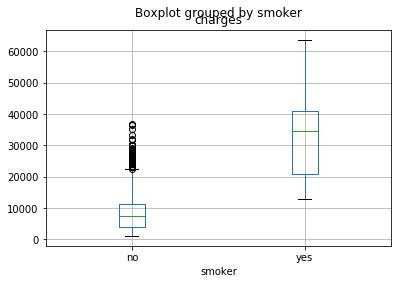

In [19]:
df.boxplot(by = 'smoker', column = 'charges')

We want to dig deeper into those outliers for the non-smokers. What are the ages or BMI of those patients? The cut function of pandas allows us to easily categorize numerical data, so the ages can be grouped into every 10 years and the the BMI grouped by the values outlined by the CDC. We will create new columns for both of these

In [20]:
# create the labels for each category. Ages will be by every 10 years and BMI is by the values from CDC
age_labels = ['{0} - {1}'.format(i, i + 9) for i in range(0, 100, 10)]
bmi_labels = ['Underweight', 'Healthy weight', 'Overweight', 'Obese']

df['age_group'] = pd.cut(df.age, range(0, 105, 10), right=False, labels=age_labels)
df['bmi_group'] = pd.cut(df.bmi, [0,18.5, 20, 30, 100], right=False, labels=bmi_labels)

df.head()

,age,sex,bmi,children,smoker,region,charges,age_group,bmi_group
0,19,female,27.900,0,yes,southwest,16884.92400,10 - 19,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,10 - 19,Obese
2,28,male,33.000,3,no,southeast,4449.46200,20 - 29,Obese
3,33,male,22.705,0,no,northwest,21984.47061,30 - 39,Overweight
4,32,male,28.880,0,no,northwest,3866.85520,30 - 39,Overweight


Now we can use the same boxplot to look at the distribution of `insurance charges` for `smokers` vs. `non-smokers` by their `BMI category` and by their `age range`.

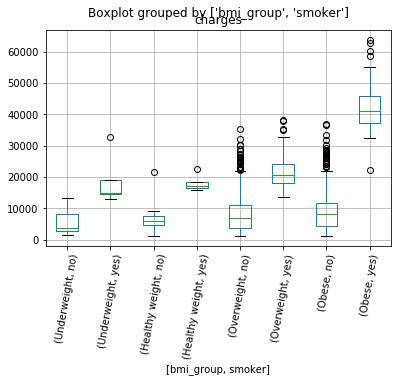

In [21]:
df.boxplot(by = ['bmi_group','smoker'], column = 'charges', rot=80)

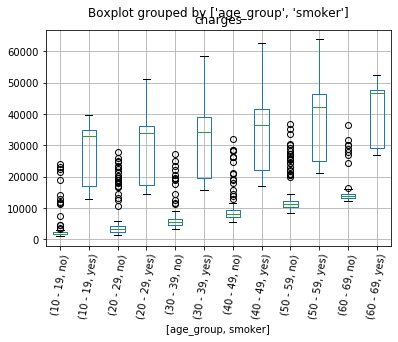

In [22]:
df.boxplot(by = ['age_group','smoker'], column = 'charges', rot=80)

### Average age by the number of children

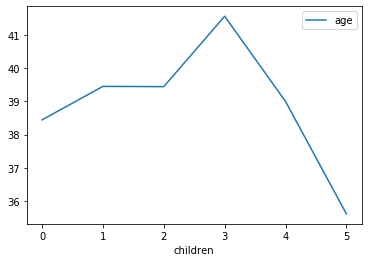

In [23]:
df[['age', 'children']].groupby('children').mean().plot()